<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/2A/TPIA/Style_Transfer_using_Python_and_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Style Transfer 

Deep Learning models often seems like black boxes that no one understands... In fact, we can actually go inside these model to understand what the model learned. Think of it as if you were looking at some coffee grounds and were trying to construe an object from it.

We are going to do some Style Transfer. You know that thing on Snapchat where you can add a Comic Filter on your face... We are basically redoing that king of style transfer in order to understand what DL is.

Goal on this lab :
* See how a model works
* Import a Pre Trained Model
* Code in class using Python


Alright, let's get started.

<img src="https://i.pinimg.com/originals/16/b2/96/16b296afb78ec57d12c931bc72b42eec.gif">

If you were an engineer, the first thing you would do is reserach about the topic. You'll quickly stumble upon this paper : https://arxiv.org/pdf/1508.06576.pdf

This paper from Gatys et al. is basically what we are going to be implementing.

Run the following Cell to import some frameworks


In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import copy
import skimage
from skimage import io
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# I - Some Practice on Python and Pytorch

First, let's have a quick run on Python. You might have used it before but let's do a quick refreshment

# a - Defining a function

We are going to define few functions. Let's define the following functions:

* add
* substract
* divide
* multiply
* power

**All your functions must take two input arguments a and b **

To define a function, it's like matlab :

```
def function(**kwargs):
      # do stuff

```

In [ ]:
def add(a,b):

def substract(a,b):

def divide(a,b):

def multiply(a,b):

def power(a, b):


Now test the functions

In [ ]:
a = 
b =


# b - Defining a class

So we basically have defined all the functions, but they are 'independant'. However, as you can see, they all have the same goal : Do some calculations...

So let's define a basic object : a Calculator. In fact, we are going to create a **Class** which **Attributes** are a and b, to which calculation **Methods** will be applied. Remember your Java Class :')

To define a class
```
class YourClass():

    def __init__(self,*kwargs):
        # Here you define the attributes of your model. 
        self.kwargs = kwargs

    def method1(self,..):
        #do stuff
    
    ...
    
```

If you still don't understand, look at the following skeleton

In [ ]:
# We consider a and b two numbers that we want to apply calculation on.
# Define a class that takes as attributes a and b and gather all the previous functions as method of this class 
# We use self to refer to something that is inside the class, an attribute or a method for example.
class Calculator():
    
    def __init__(self,a,b):
        # TODO : Fill the attributes initialisation
        self.a = ...

    
    def add(self):
        # Call and return the sum of attributes
        sum = self.a...

    def substract(self):
      ...

    def divide(self):
      ...

    def multiply(self):
      ...

    def power(self):
      ...

Now create a calculator object and do some calculation

In [ ]:
a = 
b =
calculator = Calculator(a,b)
# Call the different methods of your class. To call a method use object.method()

# About PyTorch 

PyTorch is Facebook's Deep Learning Framwork. We will be using it throughout this lab. It is not the only DL framework, you also have Tensorflow, JAX, Caffee...

We will use PyTorch as we can have lots of control on everything.

# II - Some explanation on Style Transfer

Style Transfer is doing this : 

<img src="https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img/https://godatadriven.com/wp-content/images/how-to-style-transfer/style-transfer-example.jpg">

So we have 3 things :
* A content Image (C)
* A style Image (S)
* A generated Image (G)


The principle is the following :    
* We define a Content Distance and a Style Distance. 
  * The CD measures how different the content between two images is. 
  * The SD measures how differents the style between the two images is.



We will be defining functions that we will add as things progresses in a Class.

Here is the skeleton of the class. Don't be afraid we will be progressing step by step.

In [ ]:
class Style_Transfer():

    def __init__(self,model, content_image, style_image,num_steps =500):
        # Some Useful Attributes 
        self.model_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device) 
        self.model_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)
        self.content_layers = ['conv_4']
        self.style_layers= ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
        # Some useful Constant attributes
        self.steps = 0 
        self.num_steps =num_steps
        self.style_weight=1000000
        self.content_weight=1

    def copy_model(self,model,layer,i):
        # First Method 
        return model, name ,i

    def add_module(self,model, name,content_losses, style_losses,i):
        # Second Method 
        return model , content_losses, style_losses

    def trim(self,model):
        # Third Method 
        return model
    
    def get_model_and_losses(self):
      # Fourth Method 
      return self.new_model, content_loss, style_loss

    def optimizer_img(self,input_img):
        # Fifth Method 
        return optimizer
      
    def run(self,input_image):
        # Final Boss
        return input_image


# Defining Losses

So we need to define two losses 
* StyleLoss
* ContentLoss



Some explanation about these things : 
* When you learn to differentiate Pikachu from Jigglypuff,you build a representation where features (forms, texture, colors...) are extracted from the objects.
* For a neural net, when classification is performed,images (in other words bunch of pixels) are used to construct that type of representation by extracting features from the input image. From image, the model creates a representation.

When training a model using ConvNets, they develop an understanding of the objects features. The more layers you have, the more complex the extracted features will be. 

Thus, we can separate the representation with the content (pixel value) and style (texture informations). So to compute the style and the content, we need to look at different intermediate layers of our model.

In fact, in our implementation, these are not really losses. They are more layers that we put at a certain place in the model, in order to compute Style and Content.

## Notation


For a layer $L$ that processes the input $X$, we define:
*  $F_{X;L}$, the feature map of $X$ at $L$.
* $G_{X;L}$, the Gram Matrix of $X$ at $L$.

## Content Loss

Imagine that you have a neural net composed of layers. We need a function that can represent the content of a layer. In other words we want to compute the distance between the original input image at layer L and content image at layer L. In other words, how far our Input Image is from the Content Image.

i.d : $||F_{X;L}- F_{C;L}||^2$

* What it the name of this distance ?

Let's define a ContentLoss that inherits from nn.Module



In [47]:
class ContentLoss(nn.Module):

    def __init__(self, target):
        super(ContentLoss, self).__init__()
        self.target = target.detach()

    def forward(self, input):
        # TODO : Compute the distance between the Target and the Input
        self.loss = ...

        return input

## Style Loss

The style loss is used to compute the style of a layer. Hmmm what does it mean ? We want to use a feature space designed to capture texture information. 
* How can we compute that ?

The style of an image can be computed using the mean and the correlation accross feature maps. In fact, we are going to compute the Gram Matrix of a layer. Style Features tend to be in deeped layers of the network.

* Define a Gram Matrix function (1rst year course, Analyse de Fourier 1, chp2 : Espace de Hilbert) that returns a Gram Matrix on an input.

* Do we need some normalization ? If yes, why ?



In [48]:
def Gram_Mat(input):
    # TODO : Compute the Gram Matrix of the input
    ...
    return gram_matrix

Now we need to calculate the Style Distance aka the Gram Matrix distances at a layer. 
* Let's define a Style Loss class that inherits from nn.Module.

The Style Loss returns the distance between the Gram Matrix of the target and the Input. i.d : $||G_{X;L}- G_{C;L}||^2$



In [49]:
class StyleLoss(nn.Module):

    def __init__(self,target_feature):
        super().__init__() # Remark the difference in writing in the Inheritence init. It basically doing the same
        self.target = ...

    def forward(self, input):
        # TODO : Compute the distance between the Gram Matrix of the Target and the Input
        self.loss = ...

        return input

Ok now that we have defined our loss, we need something to test in on. Let's import a pretrained model.

We will follow the paper, and load VGG19 model.

<img src="https://miro.medium.com/max/1400/1*6U9FJ_se7SIuFKJRyPMHuA.png">

# Importing a PreTrained Model

As a Deep Learning Engineer, you'll often use a model that was already trained for a specific task. Let's import VGG19. TorchVision has a huge library of model that could be loaded with pretrained weights.

* Import Pretrained VGG19 model. Have a look at : https://pytorch.org/vision/stable/models.html

Don't forget to add .eval() at the end as you do not want to change any weight of this model.

In [ ]:
model = ...

Let's have a look on what composes a VGG19 Model.
* Name every Child Module of the VGG19 model.

In fact, we won't need every layer of this model. 
* Assign only the 'feature' extractor to your model.

Don't forget to put your model into evaluation mode. 
* What is evaluation mode ? What happens to the model's weights ?

Print the model and make sure that you kept only the feature extractor.

In [ ]:
print(model)

## Some specification on VGG

This VGG was trained on images that were normalized in a specific manner. 
The mean and the std of each channels is stored in two variables for your knowledge  

* Create a Normalization layer that inherits from nn.Module.
The normalization should substract the mean and divide with the std

In [8]:
model_normalization_mean = torch.tensor([0.485, 0.456, 0.406])
model_normalization_std = torch.tensor([0.229, 0.224, 0.225])

class Normalization(nn.Module):
    def __init__(self, mean, std):
        super().__init__()
        # View is used to reshape the Tensors to a specific format.
        # Why do we resize it to -1 ,1 ,1 ?
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # Normalize IMG
        return 

Now we get to the most interesting part. The style transfert.

# III - The Main Stuff : Style Transfer

Now that we defined all we needed, we need to recreate our model and add the "losses" after each Convolutional Layer.
The Style Transfer Class will takes as attributes :
* a model
* a content image
* a style image
* a number of step for GD

We have defined few more useful attributes for this class that you will understand further.

## First Method



First method is a method to copy the layer of a model
The method : 
* takes as input an empty model, a layer and an iterative parameters i
* returns the model with the layer added, the name of the layer and i

You can indeed define it as a @staticmethod.

## Second Method
Second method is a method to add the Style Loss and Content Loss at places that are specified in the content layer and style layers attributes. The method takes as input :
* the new model
* the name of the layer
* content loss and style loss 
* and the iterative i

If the model layer's name is in the specified layer, add to the model the Content of Style layer. 
Append the Content or Style loss.

For the moment, as no input data was forwarded through the model, you should see no values.

## Third Method

Third method is used to trim the model. As we just want to keep the layers before the Content of Style Losses, we trim the model so that it doesn't keep what's after the Content and Style layers.

We wrote the method for you don't worry.


* Can we write it as a @StaticMethod ?



## Fourth Method

Fourth method builds the new model for us. In fact, the most important method is this one as it sums up all the previous layers.
To the new model attribute, we will apply all the previous methods in order to build our style transfer model.
* What do you think the steps of this algo will be ?




## Fifth Method

Fifth method is our optimizer. As in the original paper, we will use l-BFGS algorithm to run the GD.
We wrote the method for you don't worry. Usually, we use Gradient Descent in order to train the model (aka update the weights of the model). Here we will be using it to minimize the content/style losses.

* What is an optimizer ?
* Can we write it as a @staticmethod

## Final Bos.. Method

HMPF. That was a long ride. Now this is our final method. Aka the Most important method.

In fact this method will be used to run the style transfer on an input image. We feed the model an input that is updated and we compute new losses. The input image could be something else than the content image.

As you might see, this method contains a closure function. Isn't that weird ? a Function in a Function ?? This is a nested function. In this case it's a Closure. It uses values that were defined in the enclosing function. It reevaluates the module and returns the loss.

In [ ]:
class Style_Transfer():

    def __init__(self,model, content_image, style_image,num_steps =500):

        # Some Useful Attributes 
        self.model_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device) 
        self.model_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)
        self.content_layers = ['conv_4']
        self.style_layers= ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']
        # Some useful Constant attributes
        self.steps = 0 
        self.num_steps =num_steps
        self.style_weight=1000000
        self.content_weight=1

        #TODO : load the model to device 
        #TODO : create a new Sequential model with the first layer being the Normalization layer 
        self.model= ...
        self.new_model = ...
        
        # TODO : assign as attributes the content_image and style_image        
        self.content_image = ...
        self.style_image = ...


    def copy_model(self,model,layer,i):
        # First Method 
        # TODO : Check if the layer is a Layer in VGG and keep the layer name with i.
        # To Understand : What kind of Layer are present in the VGG19 Model ?
        # Every time the layer is a conv layer, the iterative parameters is incremented
        if isinstance(layer, nn.Conv2d):
            i += ...
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, ....):
            name = .format(i)
        elif isinstance(layer,..
                        
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        #TODO : add the layer to the new model with corresponding name. have a look at https://pytorch.org/docs/stable/generated/torch.nn.Module.html
        model......

        # Return the model, the name of the layer, and i
        return model, name ,i


    def add_module(self,model, name,content_losses, style_losses,i):
        # Second Method 
        # TODO : if name is in Content of Style Layer: send the Content of Style image through the new model
        #        Compute the content loss
        #        Add to the model the needed Layer
        # We wrote the example for Content Layer and We append for you the needed loss
        if name in self.content_layers:
            target = model(self.content_image).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in self.style_layers:
            ....


            style_losses.append(style_loss)
        return model , content_losses, style_losses


    def trim(self,model):
        # Third Method 
        # The trimmming of the new model.
        for i in range(len(model) - 1, -1, -1):
          if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
              break
        model = model[:(i + 1)]
        return model

    
    def get_model_and_losses(self):
      # Fourth Method 
      # Defining our much needed content and style losses list that will keep the loss and our iterative i
      content_loss, style_loss = [],[]
      i=0 
      # TODO : iterate through the original model in order to build the new model.
      for ... in ...:
          # TODO : Copy to the new model the previous model
          self.new_model , name ,i= ...
          # TODO : Add the Content and Style layers to the new model and 
          self.new_model, content_losses, style_losses = ...
      # TODO : Trim the built new model
      self.new_model = ...

      return self.new_model, content_loss, style_loss


    def optimizer_img(self,input_img):
        # Fifth Method 
        # This is our optimizer. It takes the input_img for optimisation
        optimizer = optim.LBFGS([input_img])
        return optimizer
      

    def run(self,input_image):
        # Final Boss
        # TODO : Build the model, and content and style loss
        self.new_model,content_loss,style_loss  = ...

        # Now we set require grad to the model and input image, and call our optimizer
        input_image.requires_grad_(True)
        self.new_model.requires_grad_(False)
        optimizer = self.optimizer_img(input_image)

        # TODO : Iterate and optimize the Closure function
        while ... <= ...:
          def closure():
                # We clamp the image to 0,1
                with torch.no_grad():
                    input_image.clamp_(0, 1)

                optimizer.zero_grad()
                # TODO : forward the input image through the new model
                ...

                # As the input image was forwarded through the model, the Content Loss and Style Loss 
                # values were updated. Let's compute the scores. We can add the score by iterating through
                # the content_loss and style_loss lists.
                style_score = 0
                content_score = 0

                for sl in style_loss:                  
                    style_score += sl.loss
                for cl in content_loss:
                    content_score += cl.loss

                # TODO : Mulitply the scores by the weights and define the loss by adding the scores
                ....


                loss.backward()

                # TODO : Iterate through the steps attribute and show the losses
                ....+= 1
                if ... % 50 == 0:
                    print("run {}:".format(...))
                    print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                        style_score.item(), content_score.item()))
                    print()

                return style_score + content_score

          # Now we call the optimizer to the closure.
          optimizer.step(closure)
        
        # And we clamp the image again
        with torch.no_grad():
          input_image.clamp_(0, 1)

        return input_image


# Testing 

Alright. Now that everything is put along, we can test the Style Transfer. In order to send the images through the models, we need to apply some transformations.
* Define a Compose transformation that resizes the image to a 512x512 size and converts the image to a Tensor. Have a look at : https://pytorch.org/vision/stable/transforms.html
* Load and run the Style Transfer

Try out different Style Transfer and Show us the results.

In [ ]:
imsize = ...

loader =    # TODO : Resize the Input Image to size 512,512
            # TODO : Transform into Tensor

In [ ]:
def image_loader(image_name):
    image = Image.fromarray(image_name)
    # Fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [ ]:
URL_image = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fpytorch.org%2Ftutorials%2Fadvanced%2Fneural_style_tutorial.html&psig=AOvVaw2mRWB9GRpXgVTu3MNbg0aI&ust=1643068786074000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJCMkc2KyfUCFQAAAAAdAAAAABAD"
URL_image = 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fjiweibo.github.io%2FNeural-Style-Transfer%2F&psig=AOvVaw2mRWB9GRpXgVTu3MNbg0aI&ust=1643068786074000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCJCMkc2KyfUCFQAAAAAdAAAAABAU'

In [114]:
content_image = image_loader(cv2.cvtColor(skimage.io.imread(URL_content ),cv2.COLOR_BGR2RGB))
style_image = image_loader(cv2.cvtColor(skimage.io.imread(URL_style ),cv2.COLOR_BGR2RGB))

In [ ]:
# Defining a Device for GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# TODO : Make sure that your model is only the features part of VGG19
model = ....

# TODO : Define some Random Noise for Style Transfer
input_image = ...

# TODO : Create a Style Transfer Object and run Style Transfer on a input_image. Try out some White noise
output = ...

Now Show the results

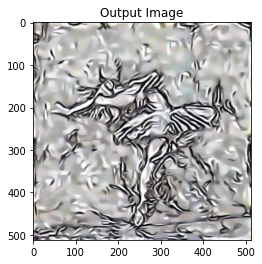

In [127]:
plt.figure()
unloader = transforms.ToPILImage()  # reconvert into PIL image

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

Isn't that beautiful ? Now try many styles.

# More explanation

In fact, the goal of this lab is to make you use DL Network and Code.

Normally, you might have an intuition of what happens in the model during this style transfer process. In fact, the more you go through the layers of your model, the higher the features will be. What does it mean ? It means that the more you step into your model, the more you'll see object part (eyes, dog booty, cup of tea...). That also means that the model understand the input image by 'seeing' the objects. These features are used for classification. This also means that the first layers will be low level features (edge...), aka feature extraction.

By accessing the intermediate layers, we are able to have a compromise between extracted features and image understanding, allowing us to describe the content and the style of the input images.

Well Done !

<img src="https://media0.giphy.com/media/l0ErFafpUCQTQFMSk/giphy.gif">